In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [2]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [3]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

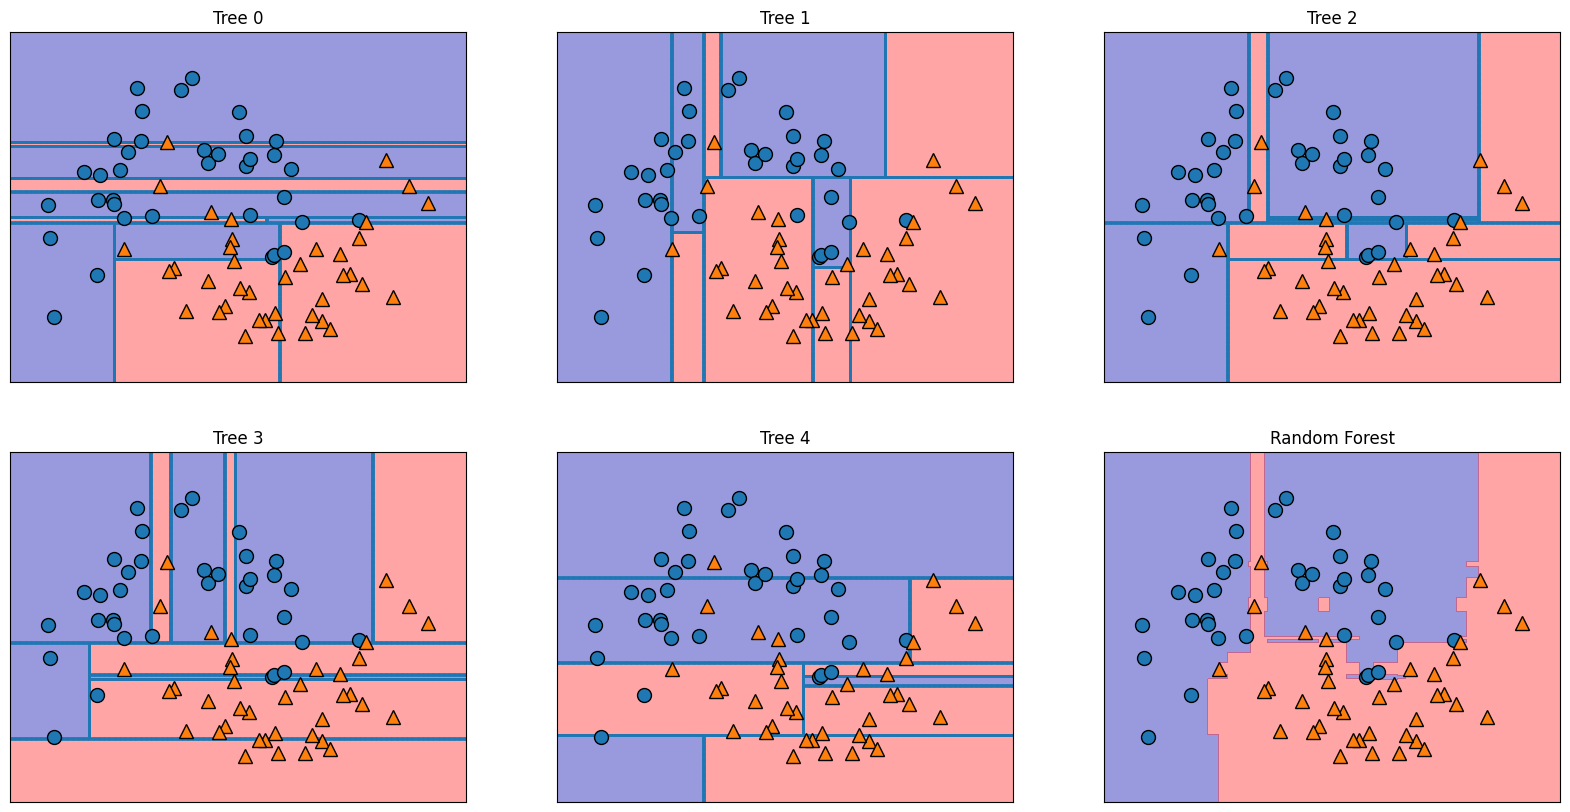

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title(f"Tree {i}")
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=0.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [7]:
cancer = load_breast_cancer()

In [8]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(cancer["data"], cancer["target"], test_size=0.25, random_state=0)

In [36]:
print(sum(cancer["feature_names"] != 1))

30


In [46]:
forest = RandomForestClassifier(n_estimators=100, random_state=0, max_features=10, n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestClassifier(max_features=10, n_jobs=-1, random_state=0)

In [47]:
print(f"Accuracy on training set: {forest.score(X_train, y_train)}")
print(f"Accuracy on test set: {forest.score(X_test, y_test)}")

Accuracy on training set: 1.0
Accuracy on test set: 0.972027972027972


In [13]:
forest.feature_importances_

array([0.02515433, 0.01563844, 0.05372655, 0.04861645, 0.00769078,
       0.00936994, 0.05539489, 0.10305394, 0.0065771 , 0.00282708,
       0.02921459, 0.00607814, 0.01342868, 0.03420174, 0.00360641,
       0.00432096, 0.00448775, 0.00657502, 0.00460597, 0.00627095,
       0.11657269, 0.01603133, 0.16027724, 0.0634688 , 0.01356448,
       0.01164113, 0.03923725, 0.11711756, 0.01164259, 0.00960721])

In [15]:
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


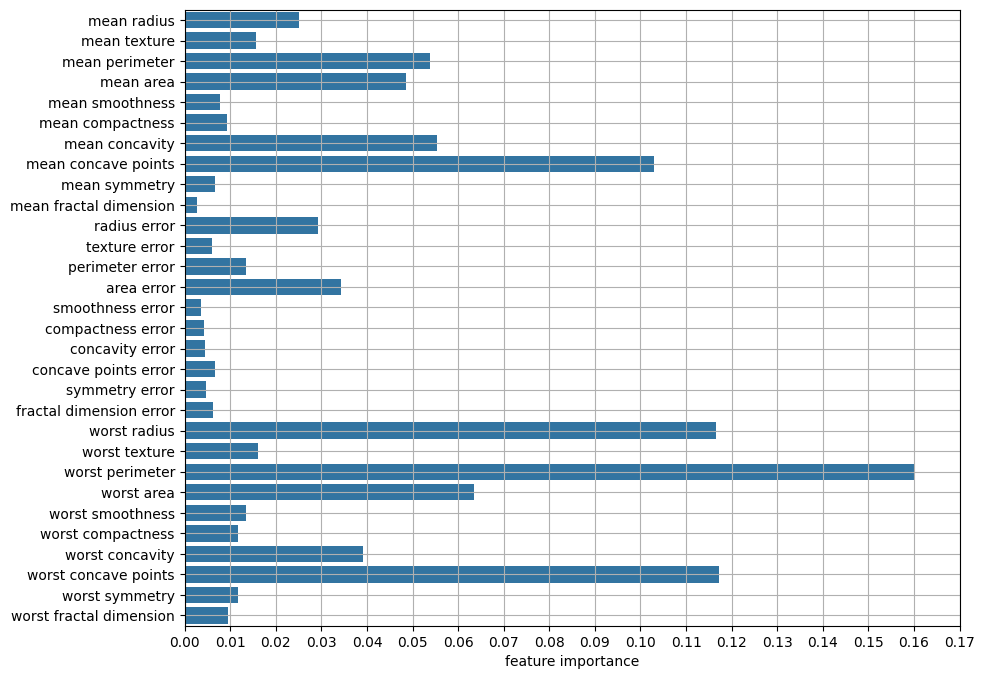

In [22]:
import numpy as np

plt.figure(figsize=(10, 8))
sns.barplot(orient="h", x=forest.feature_importances_, y=cancer["feature_names"])
plt.grid()
plt.xlabel("feature importance")
plt.xticks(np.arange(0, 0.18, 0.01))
plt.show()